<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

<div class="alert alert-info"> <b>Student сomments:</b> The purpose of this project is to identify patterns whether or not a game will succeed. This will allow us to determine games with strong sales and plan advertising budget accordingly. The data we are given is from 2016 and we are forecasting sales for 2017. The data contains the names, platforms, genres, sales of different regions, reviews, and ratings. First we will prepare the data, then we will make graphs to determine patterns within. Finally we will test our hypothesises and make conclusions.</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Success

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("/datasets/games.csv")

In [3]:
#Replace the columns names with lowercase
df.columns = df.columns.str.lower()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#check for duplicates
df.duplicated().any()

False

In [6]:
#change datatype of user_score to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

There were some 'tbd' strings within the user_score column. We replaced the data type to a float by forcing all errors to NaN.


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

I agree

I will be leaving the critic_score's NaNs alone, because I don't want to affect the existing numeric data. I will be leaving the user_score's NaN alone, because I don't want to affect the existing numeric data. As for the rating, I will be leaving it alone as well.

In [7]:
#Calculate the total sales for each game
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
You can also use sum with axis=1 argument

In [8]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Please, add an intermediate conclusion about this introductory part. What have been done, what hypotheses about the data do we have and what we are going to do next

<div class="alert alert-info"> <b>Student сomments:</b> Conclusion: There were some 'tbd' strings within the user_score column. We replaced the data type to a float by forcing all errors to NaN. I will be leaving the critic_score's NaNs alone, because I don't want to affect the existing numeric data. I will be leaving the user_score's NaN alone, because I don't want to affect the existing numeric data. As for the rating, I will be leaving it alone as well. We created a total sales column by adding all the regions sales together. <br> First we will find total sales by year. Then we disregard previous years to have a more updated dataset. For null hypothesis, we will assume that average sales by genre and platforms are same. As for alternative hypothesis, we will assume that they are different.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right

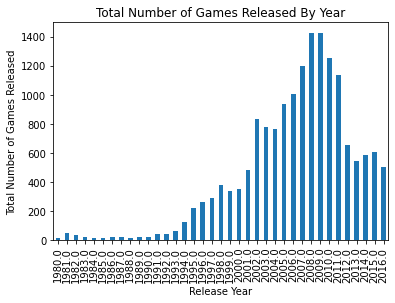

In [9]:
pivot_table = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
pivot_table.plot(
    kind='bar',
    xlabel='Release Year',
    ylabel='Total Number of Games Released',
    legend=False,
    title='Total Number of Games Released By Year'
                )
plt.show()


<div class="alert alert-block alert-warning">📝

__Reviewer's comment №1__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
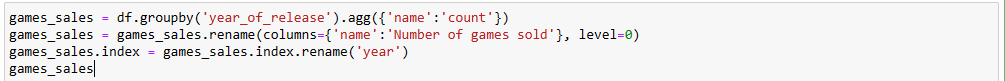
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
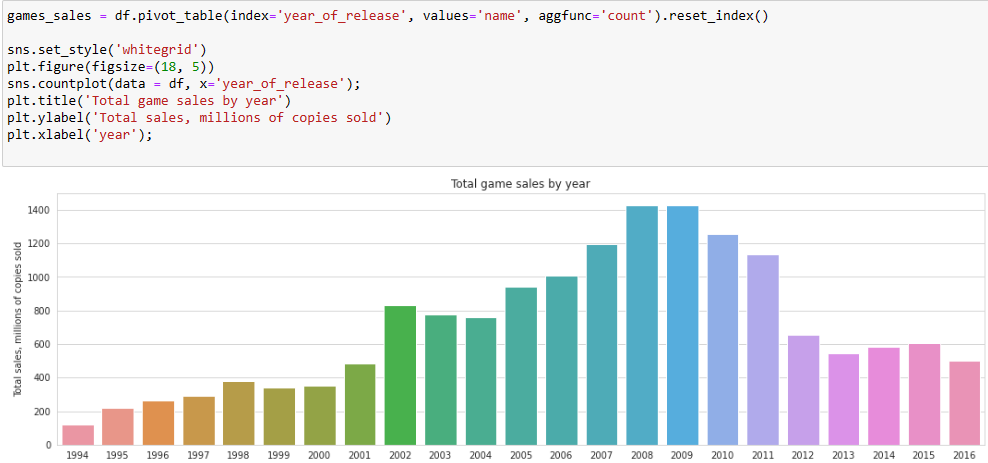
</div>

<div class="alert alert-info"> <b>Student сomments:</b> Noted. Added below</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__
Brilliant

In [10]:
games_sales = df.groupby('year_of_release').agg({'name':'count'})
games_sales = games_sales.rename(columns={'name':'Number of Games Sold'}, level=0)
games_sales.index = games_sales.index.rename('year')
games_sales

,Number of Games Sold
year,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


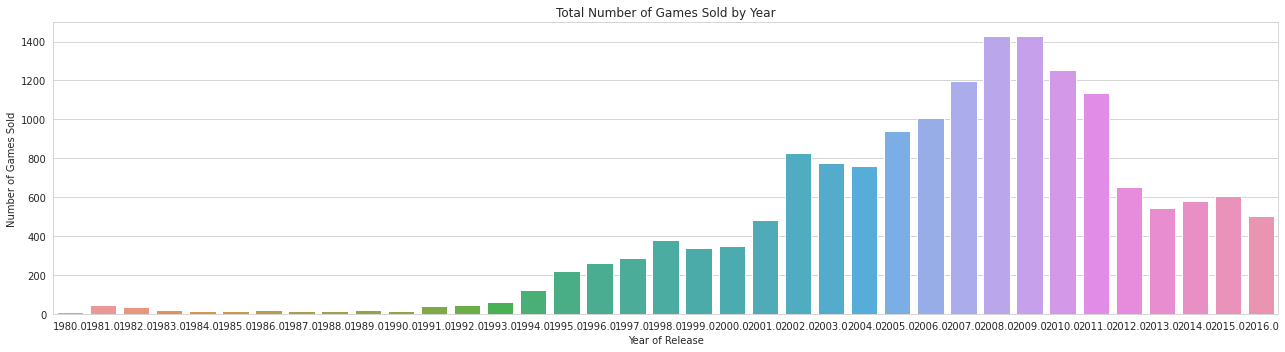

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,5))
sns.countplot(data=df, x='year_of_release')
plt.title('Total Number of Games Sold by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Sold')
plt.tight_layout()
plt.show()

From the years 1980 up to 1993, the data are insignificant compared to the data from 1994 onwards.

In [12]:
#Create a dataframe based off of the platforms' total sales and take the top 15
df_top15 = df.groupby('platform').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False).reset_index().head(15)
top_platforms = df_top15['platform'].tolist()
filtered_df = df[df['platform'].isin(top_platforms)]
filtered_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


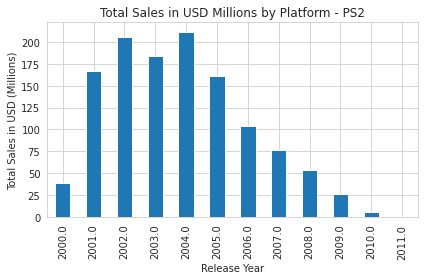

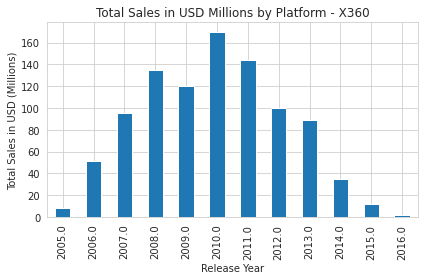

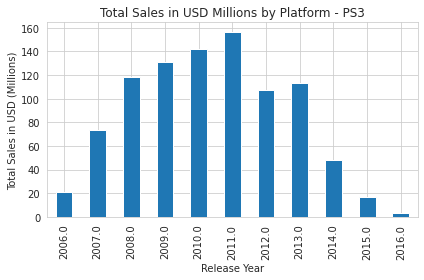

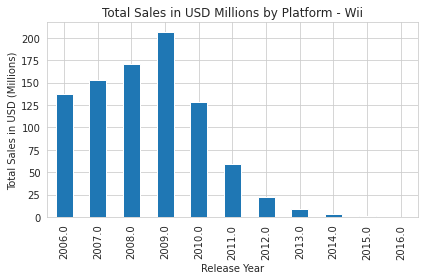

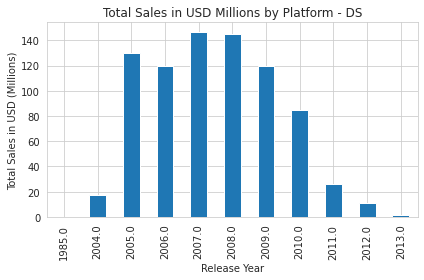

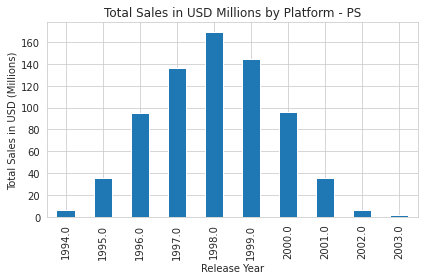

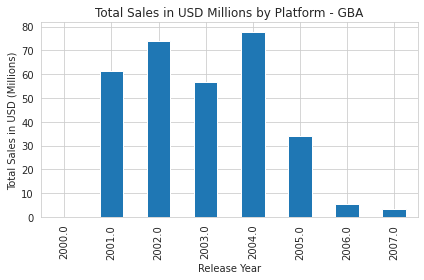

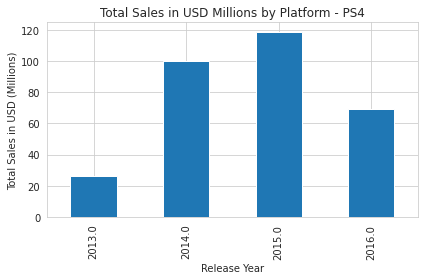

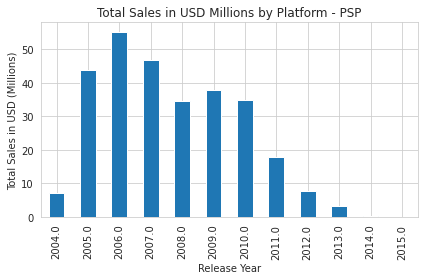

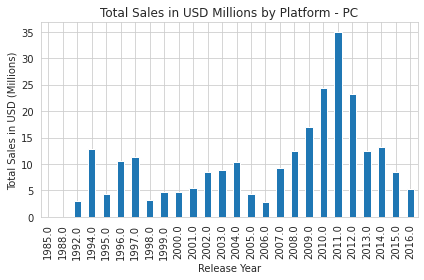

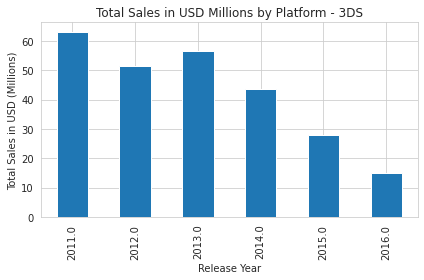

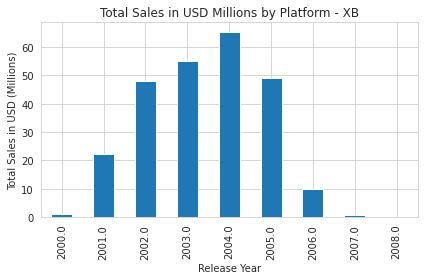

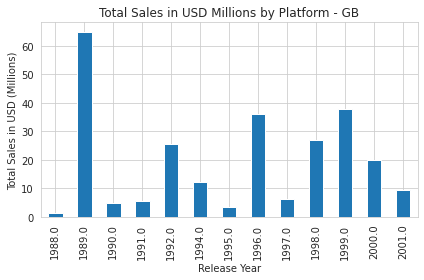

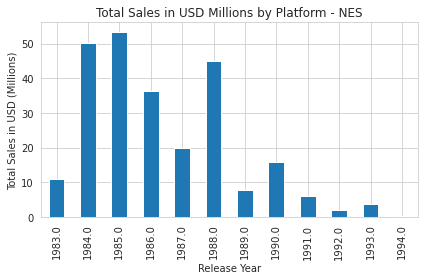

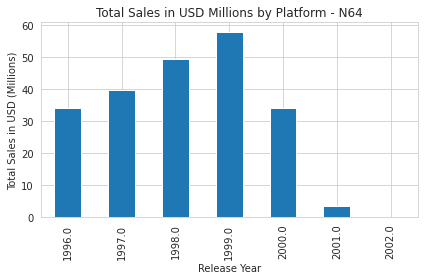

In [13]:
#Create bar plots for each of the 15 top platforms
for platform in top_platforms:
    # Filter DataFrame for the current platform
    df_platform = filtered_df[filtered_df['platform'] == platform]
    
    # Create a pivot table to aggregate the data
    pivot_table = df_platform.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    
    # Plot the pivot table
    pivot_table.plot(
        kind='bar',
        xlabel='Release Year',
        ylabel='Total Sales in USD (Millions)',
        legend=False,
        title=f'Total Sales in USD Millions by Platform - {platform}'  # Include platform name in title
    )
    plt.tight_layout()
    plt.show()


Based on the plots above:
- PS2: Popular between years 2000-2011. Sales started to decline year 2004 up to 2011 where sales completely stopped.
- X360: Popular between years 2005-2016. Sales started to decline year 2010 up to current year 2016.
- PS3: Popular between years 2006-2016. Sales started to decline year 2011 up to current year 2016.
- Wii: Popular between years 2006-2016. Sales started to decline year 2009 up to current year 2016.
- DS: Popular between years 2004-2016. Sales started to decline year 2010 up to 2013 where sales completely stopped.
- PS: Popular between years 1994-2003. Sales started to decline year 1998 up to 2003 where sales completely stopped.
- GBA: Popular between 2000-2007. Sales started to decline year 2004 up to 2007 where sales completely stopped.
- PS4: Popular between 2013-2016. Sales started to decline year 2015 up to current year 2016.
- PSP: Popular between 2004-2015. Sales started to decline year 2006 up to 2015 where sales completely stopped.
- PC: Popular between 1992-2016. Sporadic sales graph.
- 3DS: Popular between 2011-2016. Sales started to decline year 2011 up to current year 2016.
- XB: Popular between 2000-2008. Sales started to decline year 2011 up to current year 2016.
- GB: Popular between 1988-2001. Sporadic sales graph.
- NES: Popular between 1983-1994. Sales started to decline year 1985 up to year 1994 where sales completely stopped.
- N64: Popular between 1996-2002. Sales started to decline year 1999 up to year 2002 where sales completely stopped.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

Overall, it takes about 3-5 years for old platforms to fade out and new platforms to appear. All of these platforms are shrinking in sales. <br>
I have decided I want to include years 1994 and higher to be relevant data set and discard 1993 and under. This will include all the data of the popular platforms with the exception of the PC.

In [14]:
#Create new filtered dataframe to discard any games before 2013.
new_filtered_df = filtered_df[filtered_df['year_of_release'] > 2013]
new_filtered_df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


<div class="alert alert-block alert-danger">✍

__Reviewer's comment №1__


For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

<div class="alert alert-info"> <b>Student сomments:</b> Noted. I will use data from 2013 and up.</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Now correct

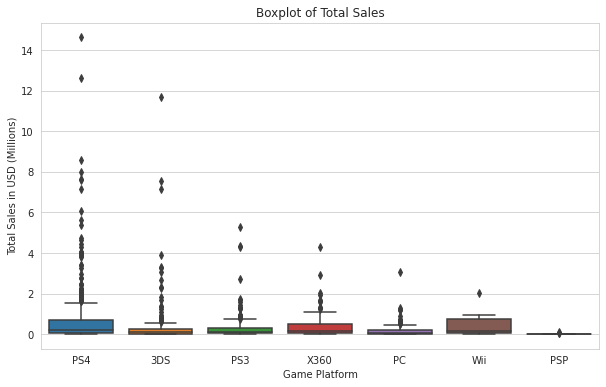

In [15]:
# Create a boxplot using seaborn with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_filtered_df, x='platform', y='total_sales')
plt.xlabel('Game Platform')
plt.ylabel('Total Sales in USD (Millions)')
plt.title('Boxplot of Total Sales')
plt.show()

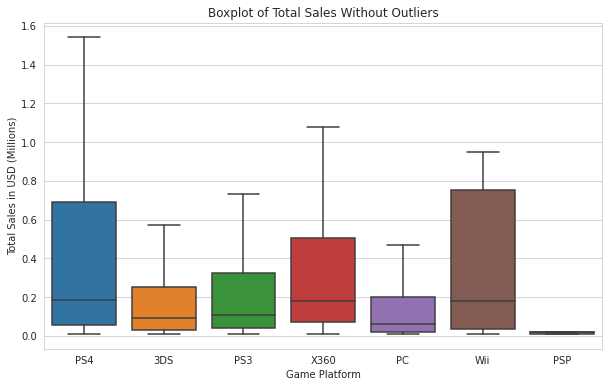

In [16]:
# Create a boxplot using seaborn without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_filtered_df, x='platform', y='total_sales', showfliers=False)
plt.xlabel('Game Platform')
plt.ylabel('Total Sales in USD (Millions)')
plt.title('Boxplot of Total Sales Without Outliers')
plt.show()

In [17]:
sorted_df = new_filtered_df.groupby('platform').agg({'total_sales':['sum','median','mean']}).reset_index()
sorted_df = sorted_df.sort_values(by=('total_sales', 'sum'), ascending=False)
sorted_df

platform total_sales                 
                   sum median      mean
3      PS4      288.15  0.185  0.766356
0      3DS       86.68  0.090  0.408868
2      PS3       68.18  0.110  0.311324
6     X360       48.22  0.180  0.434414
1       PC       27.05  0.060  0.179139
5      Wii        5.07  0.180  0.460909
4      PSP        0.36  0.020  0.027692

The top 5 platforms leading in sales are: PS2, X360, PS3, Wii, and DS. All of these platforms have a declining sales up to 2017. Due to the extreme outliers, it is hard to see the boxplots in detail as shown in the first graph. As for the averages, using the medians will give a better average due to the large right skew induced by the extreme outliers. The top 3 average sales (based off of median) per platform are: GB, N64, and PS3. 

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Please correct the conclusions after correcting the actual period

<div class="alert alert-info"> <b>Student сomments:</b> New Conclusion: The top 5 platforms in sales are: PS4, 3DS, PS3, X360 and PC. Due to extreme outliers, using the medians will give a more accurate representation of the average sales. The top 3 averages based off of median: PS4, X360, and Wii respectively. If we used the mean, top 3 platforms are: PS4, Wii, and X360 respectively.</div>

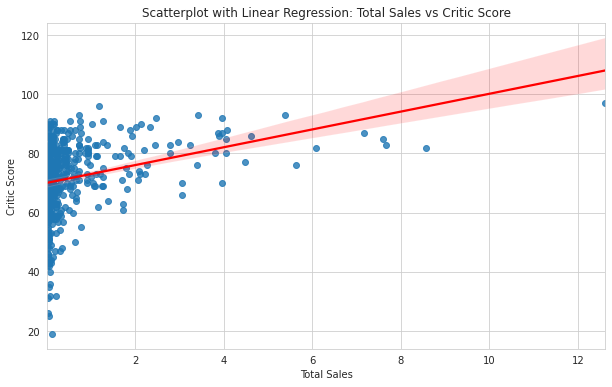

In [18]:
#Create a scatter plot correlating sales and critic score
plt.figure(figsize=(10, 6))
sns.regplot(data=new_filtered_df, x='total_sales', y='critic_score', line_kws={'color': 'red'})
plt.xlabel('Total Sales')
plt.ylabel('Critic Score')
plt.title('Scatterplot with Linear Regression: Total Sales vs Critic Score')
plt.show()


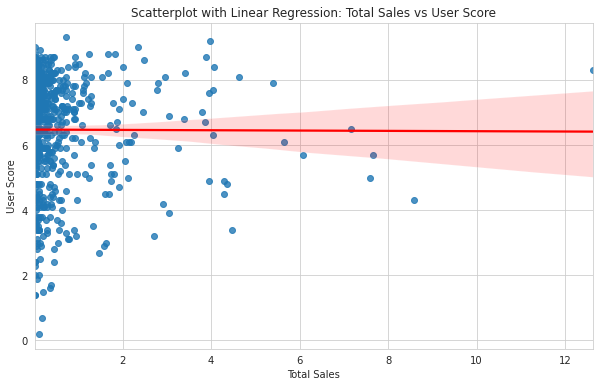

In [19]:
#Create a scatter plot correlating sales and user score
plt.figure(figsize=(10, 6))
sns.regplot(data=new_filtered_df, x='total_sales', y='user_score', line_kws={'color': 'red'})
plt.xlabel('Total Sales')
plt.ylabel('User Score')
plt.title('Scatterplot with Linear Regression: Total Sales vs User Score')
plt.show()

In [20]:
# Calculate correlation coefficient between total_sales and critic_score
correlation_coefficient_critic = new_filtered_df['total_sales'].corr(new_filtered_df['critic_score'])

# Calculate correlation coefficient between total_sales and user_score
correlation_coefficient_user = new_filtered_df['total_sales'].corr(new_filtered_df['user_score'])


print("Correlation Coefficient Between Total Sales and Critic Score:", correlation_coefficient_critic)
print("Correlation Coefficient Between Total Sales and User Score:", correlation_coefficient_user)

Correlation Coefficient Between Total Sales and Critic Score: 0.3063183688830996
Correlation Coefficient Between Total Sales and User Score: -0.003469264146273061


It looks like the critic score has a higher correlation coefficient than that of the user score. This means the professional critic score reviews has a higher impact than the user scores for total sales.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

We need to build dependency plots (scatter) and Pearson correlation for the top 3-4 platforms of the current period.  (The assignment is to relate the conclusions to the sales of games on other platforms, because the conclusions based on calculations across multiple platforms look "weightier" and more convincing)

<div class="alert alert-info"> <b>Student сomments: </b> Noted. Please see below.

Pearson correlation for PS4:
year_of_release   -0.214338
na_sales           0.928090
eu_sales           0.958109
jp_sales           0.538524
other_sales        0.998252
critic_score       0.402661
user_score        -0.040132
total_sales        1.000000
Name: total_sales, dtype: float64
Pearson correlation for 3DS:
year_of_release   -0.077659
na_sales           0.926824
eu_sales           0.902940
jp_sales           0.844990
other_sales        0.933912
critic_score       0.314117
user_score         0.215193
total_sales        1.000000
Name: total_sales, dtype: float64
Pearson correlation for PS3:
year_of_release   -0.215222
na_sales           0.899533
eu_sales           0.945808
jp_sales           0.149133
other_sales        0.990464
critic_score       0.446575
user_score        -0.166761
total_sales        1.000000
Name: total_sales, dtype: float64


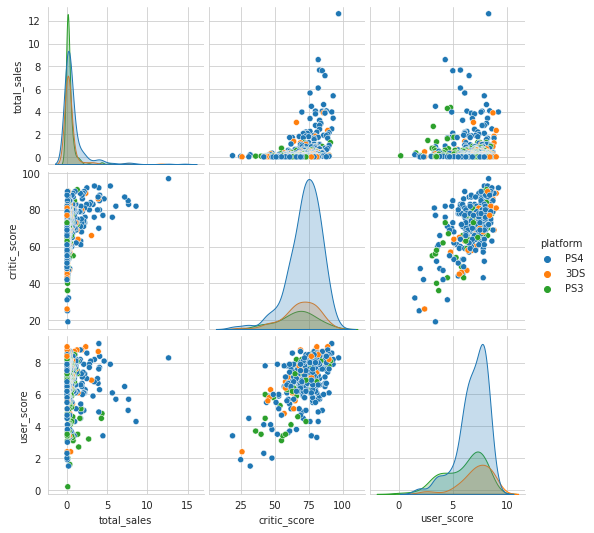

In [21]:
top_platforms = sorted_df['platform'].head(3)  # Selecting the top 3 platforms
top_platforms_data = new_filtered_df[new_filtered_df['platform'].isin(top_platforms)]

# Creating scatter plots for the top platforms
sns.pairplot(data=top_platforms_data, hue='platform', diag_kind='kde', vars=['total_sales', 'critic_score', 'user_score'])
# You can customize pairplot arguments as needed, such as vars=['column1', 'column2'] to select specific columns

# Calculating Pearson correlation for top platforms
for platform in top_platforms:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    correlation_matrix = platform_data.corr()
    pearson_corr_sales = correlation_matrix['total_sales']
    print(f"Pearson correlation for {platform}:")
    print(pearson_corr_sales)

<div class="alert alert-info"> <b>Student сomments:</b> The PS4, 3DS, PS3 critic scores have correlations of 0.40, 0.31, and 0.44 respectively to the total sales, which indicate a slight positive correlation. Meanwhile, the PS4, 3DS, PS3 user scores have correlations of -0.04, 0.22, -0.17 respectively, which indicates the user scores have little to no correlation to the total sales.

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №2__

Correct interpretation of Pearson correlation values. Good for you =)

</div>

In [22]:
#Filter dataframe with the most common names of games (6 or more) in other platforms
same_game = new_filtered_df['name'].value_counts(ascending=False).reset_index()
same_game = same_game.rename(columns={'index':'name', 'name':'total_count'})
same_game = same_game[same_game['total_count'] > 4]
game_list = same_game['name'].tolist()
game_list_df = new_filtered_df[new_filtered_df['name'].isin(game_list)]
game_list_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
494,FIFA 15,X360,2014.0,Sports,0.79,1.92,0.00,0.21,NaN,4.2,E,2.92
1548,The LEGO Movie Videogame,X360,2014.0,Action,0.69,0.47,0.00,0.11,69.0,7.2,E10+,1.27
2180,Skylanders: Trap Team,Wii,2014.0,Action,0.41,0.46,0.00,0.08,NaN,NaN,E10+,0.95
2232,Lego Batman 3: Beyond Gotham,PS4,2014.0,Action,0.37,0.40,0.00,0.15,73.0,7.1,E10+,0.92
2236,The LEGO Movie Videogame,PS3,2014.0,Action,0.33,0.43,0.02,0.15,80.0,6.8,E10+,0.93
2301,LEGO Jurassic World,PS4,2015.0,Action,0.32,0.42,0.02,0.14,70.0,7.0,E10+,0.90
2315,Skylanders: Trap Team,X360,2014.0,Action,0.54,0.27,0.00,0.08,NaN,NaN,E10+,0.89
2335,Lego Batman 3: Beyond Gotham,X360,2014.0,Action,0.48,0.33,0.00,0.08,NaN,6.8,E10+,0.89


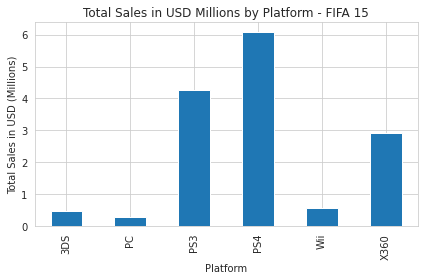

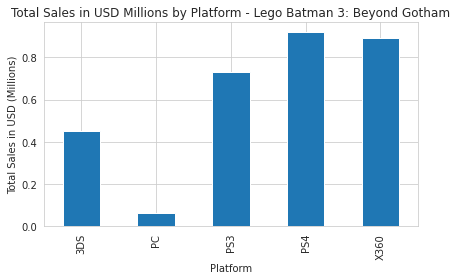

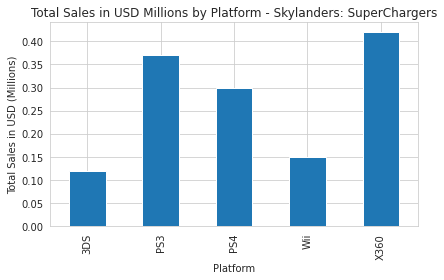

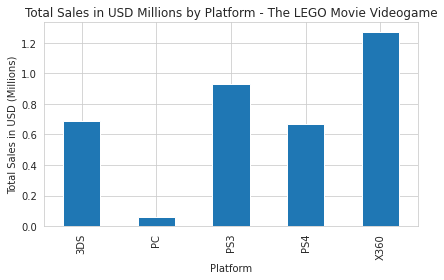

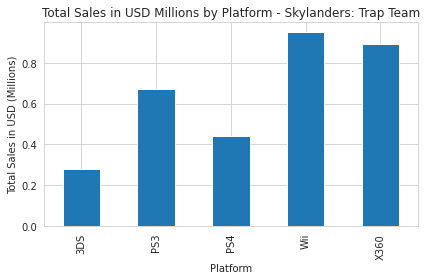

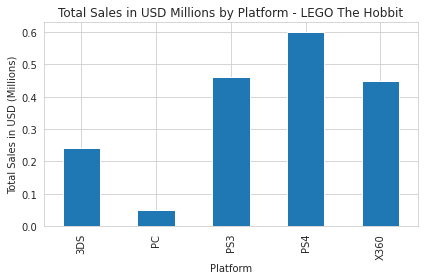

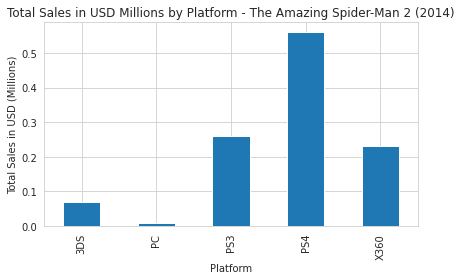

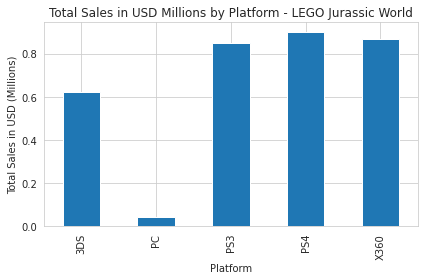

In [23]:
#Create bar plots for each game with names of 6 or more in other platforms
for name in game_list:
    # Filter DataFrame for the current name
    df_name = new_filtered_df[new_filtered_df['name'] == name]
    
    # Create a pivot table to aggregate the data
    pivot_table = df_name.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    
    # Plot the pivot table
    pivot_table.plot(
        kind='bar',
        xlabel='Platform',
        ylabel='Total Sales in USD (Millions)',
        legend=False,
        title=f'Total Sales in USD Millions by Platform - {name}'  # Include platform name in title
    )
    plt.tight_layout()
    plt.show()

Individually, we can see the sales by each platform for games with multiple platforms. However, it is hard to conclusively say anything unless we sum them together as seen below.

In [24]:
df_same_game = game_list_df.groupby(['name', 'platform']).agg({'total_sales':'sum'}).reset_index()
df_same_game

,name,platform,total_sales
0,FIFA 15,3DS,0.46
1,FIFA 15,PC,0.29
2,FIFA 15,PS3,4.28
3,FIFA 15,PS4,6.08
4,FIFA 15,Wii,0.56
5,FIFA 15,X360,2.92
6,LEGO Jurassic World,3DS,0.62
7,LEGO Jurassic World,PC,0.04
8,LEGO Jurassic World,PS3,0.85
9,LEGO Jurassic World,PS4,0.90


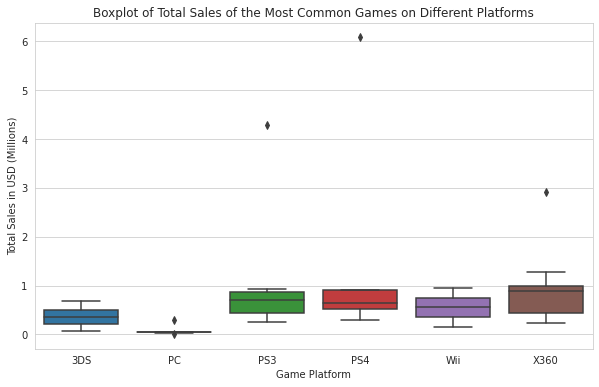

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_same_game, x='platform', y='total_sales')
plt.xlabel('Game Platform')
plt.ylabel('Total Sales in USD (Millions)')
plt.title('Boxplot of Total Sales of the Most Common Games on Different Platforms')
plt.show()

As you can see, this graph shows that PS4 and PS are the best platforms for total sales for games on multiple platforms (6 or more). So it seems like most games are best compatible with PS4 and PS.

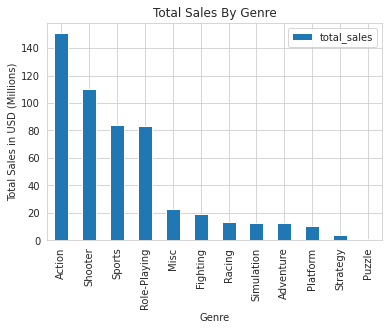

In [26]:
#Create dataframe by genre
df_genre = new_filtered_df.groupby('genre').agg({'total_sales':'sum'}).sort_values('total_sales',ascending=False)
df_genre.plot(kind='bar', xlabel='Genre', ylabel='Total Sales in USD (Millions)', title='Total Sales By Genre')
plt.show()

The most profitable genre is action. The least profitable is puzzle.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Your calculations need to be supplemented a little more. Total sales is a poor metric for finding the most profitable genre. High overall sales numbers can hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It's better to find a genre where games consistently bring in high revenue - for that it's worth considering average or median sales
    
---
    
Ideally, visualize the data distribution using boxplot()
</div>

<div class="alert alert-info"> <b>Student сomments:</b> Noted. Please see below.

total_sales          
                  median      mean
genre                             
Shooter            0.410  1.250909
Sports             0.180  0.728522
Platform           0.140  0.452609
Role-Playing       0.130  0.578264
Fighting           0.125  0.423478
Simulation         0.105  0.335526
Action             0.100  0.384796
Racing             0.090  0.285957
Misc               0.080  0.345303
Puzzle             0.060  0.103333
Strategy           0.060  0.113871
Adventure          0.055  0.132021

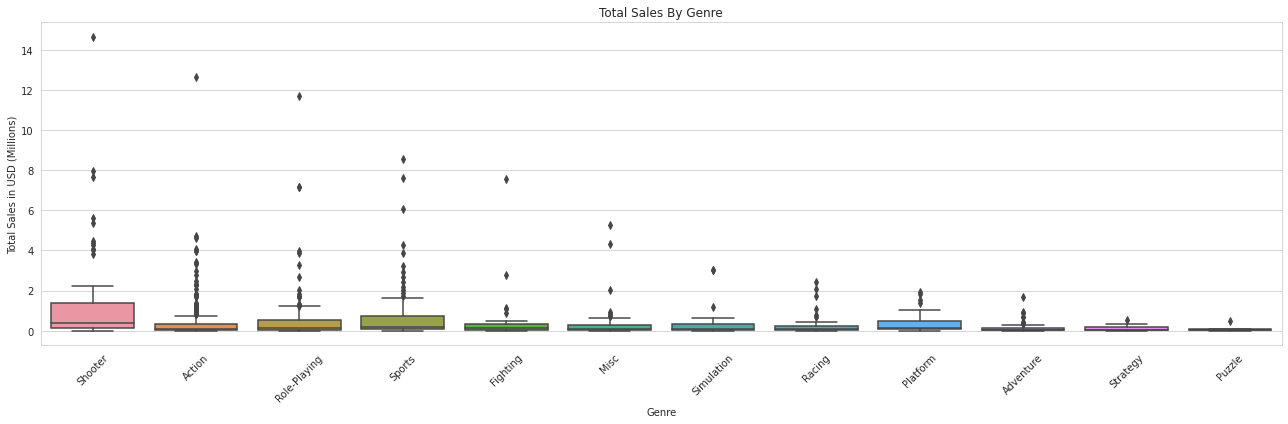

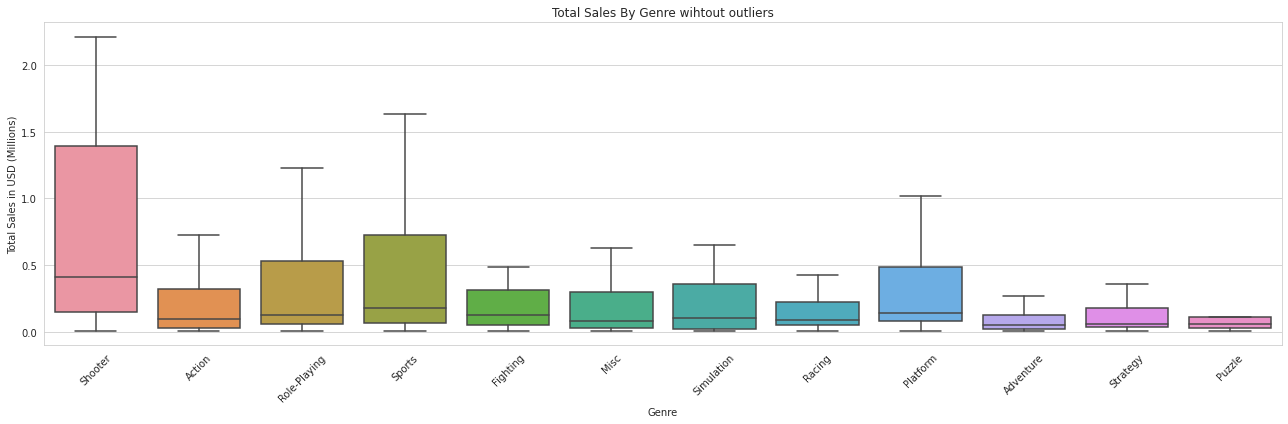

In [27]:
#Create dataframe by genre
df_genre = new_filtered_df.groupby('genre').agg({'total_sales':['median','mean']}).sort_values(('total_sales','median'),ascending=False)
display(df_genre)

# Create boxplot
plt.figure(figsize=(18,6))
sns.boxplot(data=new_filtered_df, x='genre', y='total_sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales in USD (Millions)')
plt.title('Total Sales By Genre')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create boxplot without outliers
plt.figure(figsize=(18,6))
sns.boxplot(data=new_filtered_df, x='genre', y='total_sales', showfliers=False)
plt.xlabel('Genre')
plt.ylabel('Total Sales in USD (Millions)')
plt.title('Total Sales By Genre wihtout outliers')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-info"> <b>Student сomments:</b> Because we have extreme outliers, we are going to use the median to compare sales between genres. As we can see from the boxplot, shooter, sports, and platforms are the top 3 selling genres respectively. Even though action and role-playing genres are higher total sales, they had extreme outliers with extremely high sales. We want to find a genre that can consistently bring more sales rather than depend on a few big winners.

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №2__

Well done

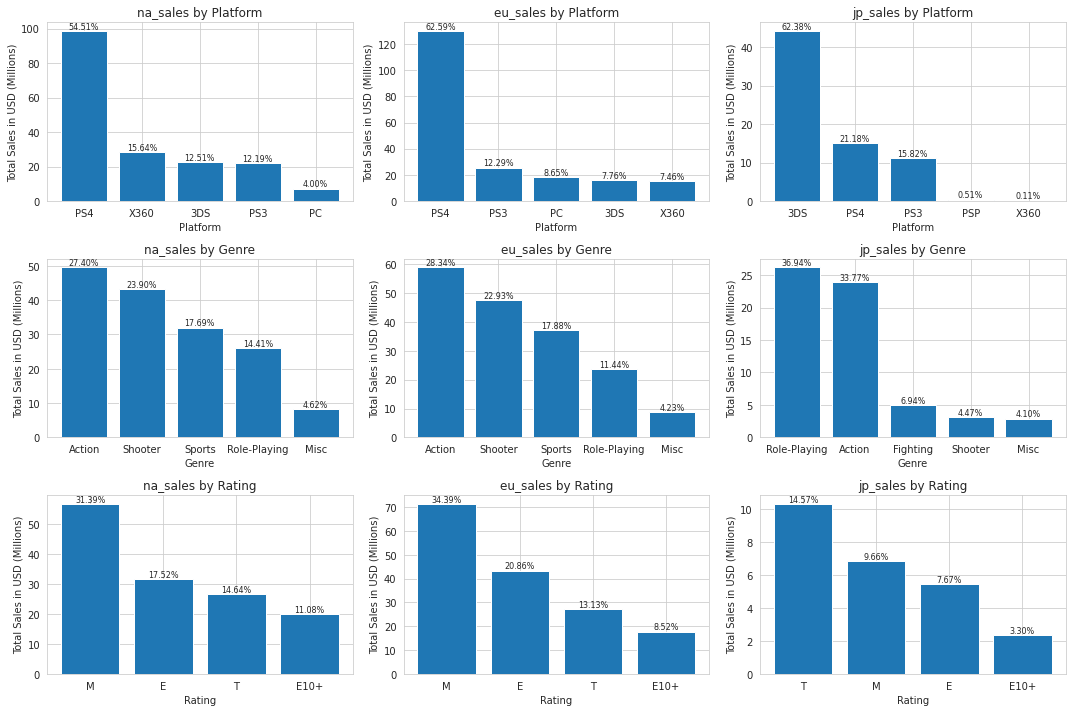

In [28]:
#Create a user profile for each region
list_region = ['na_sales','eu_sales','jp_sales']


fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # Create a 3x3 subplot grid

for idx, region in enumerate(list_region):
    df_region = new_filtered_df[new_filtered_df[region] > 0]
    total_sales_region = df_region[region].sum()  # Total sales in the region
    
    df_region_platform = df_region.groupby('platform').agg({region:'sum'}).reset_index().sort_values(region, ascending=False).head(5)
    df_region_genre = df_region.groupby('genre').agg({region:'sum'}).reset_index().sort_values(region, ascending=False).head(5)
    df_region_ratings = df_region.groupby('rating').agg({region:'sum'}).reset_index().sort_values(region, ascending=False)
    
    # Plot region by platform
    ax = axs[0, idx]  # First row
    ax.bar(df_region_platform['platform'], df_region_platform[region])
    ax.set_xlabel('Platform')
    ax.set_ylabel('Total Sales in USD (Millions)')
    ax.set_title(f'{region} by Platform')
    
    # Calculate and annotate percentage for each platform
    for i, (value, label) in enumerate(zip(df_region_platform[region], df_region_platform['platform'])):
        percentage = (value / total_sales_region) * 100
        ax.text(i, value, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)
    
    # Plot region by genre
    ax = axs[1, idx]  # Second row
    ax.bar(df_region_genre['genre'], df_region_genre[region])
    ax.set_xlabel('Genre')
    ax.set_ylabel('Total Sales in USD (Millions)')
    ax.set_title(f'{region} by Genre')
    
    # Calculate and annotate percentage for each genre
    for i, (value, label) in enumerate(zip(df_region_genre[region], df_region_genre['genre'])):
        percentage = (value / total_sales_region) * 100
        ax.text(i, value, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)
    
    # Plot region by rating
    ax = axs[2, idx]  # Third row
    ax.bar(df_region_ratings['rating'], df_region_ratings[region])
    ax.set_xlabel('Rating')
    ax.set_ylabel('Total Sales in USD (Millions)')
    ax.set_title(f'{region} by Rating')
    
    # Calculate and annotate percentage for each rating
    for i, (value, label) in enumerate(zip(df_region_ratings[region], df_region_ratings['rating'])):
        percentage = (value / total_sales_region) * 100
        ax.text(i, value, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()  # Adjust layout
plt.show()  # Show all subplots together


As shown above, the popularity of NA platforms and genres is similar to the popularity that of EU. Both continents have similar tastes. The real difference is JP platforms and genres where the DS is the most popular platform and role-playing is the most popular genre. It does seem like ESRB ratings do affect sales in the regions. The E and M ratings captures a high percentage of population; therefore more people are inclined to play.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Please correct the conclusions after correcting the actual period

<div class="alert alert-info"> <b>Student сomments:</b>  New Conclusion: <br> Both NA and EU top platform is PS4, with 54.5% and 62.6% respectively. However, JP top platform is 3DS with 62.4%. <br> Both NA and EU top genres are Action, Shooter, and Sports. However, JP has Role-playing, Action and Fighting as top genres. <br> Both NA and EU top ratings are M, E, and T. JP top ratings are T, M, E in that order. <br> This shows that NA and EU have similar tastes when it comes to games. NA and EU tend to favor Mature games. JP tends to favor Teen games. 

In [29]:
#Create dataframe to separate user score by platform using the original df
xone_rating = df[df['platform'] == 'XOne']['user_score']
pc_rating = df[df['platform'] == 'PC']['user_score']

#Test hypothesis
alpha = 0.05
results = st.ttest_ind(xone_rating, pc_rating, nan_policy="omit", equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  4.935072360183565e-06
We reject the null hypothesis


Null Hypothesis : Average user ratings of the Xbox One and PC platforms are the same. <br>
Alternative Hypothesis: Average user ratings of the Xbox One and PC platforms are not the same. <br>
This low probability suggests that the observed result is quite unlikely to occur by random chance alone under the assumption of average ratings are the same. Therefore, we reject the null hypothesis and accept the alternative hypothesis.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the Null and Alternative hypotheses

In [30]:
action_rating = df[df['genre'] == 'Action']['user_score']
sports_rating = df[df['genre'] == 'Sports']['user_score']

#Test hypothesis
alpha = 0.05
results = st.ttest_ind(action_rating, sports_rating, nan_policy="omit", equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.11483818791498648
We can't reject the null hypothesis


Null Hypothesis : Average user ratings of the Action and Sports genres are the same. <br>
Alternative Hypothesis: Average user ratings of the Action and Sports genre are not the same. <br>
This high probability suggests that the observed result is likely to occur by random chance alone under the assumption of average ratings are the same. Therefore we must accept the null hypothesis.

Because we are comparing two different means, the best test would be the ttest_ind(). <br>
We want to figure out if the average user ratings are the same between platforms or genres. So that's how we got the null hypothesis. The alternative hypothesis would be if the user ratings are not the same between platforms or genres.<br>
A significance level of 0.05 is common in hypothesis testing and strikes a good balance.


In conclusion, I have discarded the games made before 2013. Because the year of 2016 was not complete, the data may be lower than expected in the year of 2016. We also decided to use the top 15 platforms in total sales rather than the all the platforms, because there were too many platforms. Many are insignificant. <br>
 - In terms of sales, the outliers really impacted the total sales of each platform. Therefore, we took the median to calculate the averages of sales. Overall, all the top platforms have shrinking sales. 
 - It looks like the critic score has a slight positive correlation to the total sales, while the user scores have little to no correlation to the total sales. Critic scores is more impactful.
 - PS4, PS, and X360 the best platforms for total sales for games on multiple platforms (5 or more). Most games are best compatible with PS4, PS, and X360. These platforms should be used if we are looking to increase sales.
 - The popularity of NA platforms and genres is similar to the popularity that of EU. The real difference is JP platforms and genres where 3DS is the most popular platform and role-playing is the most popular genre in Japan. ESRB ratings seem to affect sales. NA and EU tends to prefer Mature ratings, which might have more explicit material such as blood. JP tend to prefer Teen games, which may not be as explicit as Mature rating.


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__
    
Excellent conclusion!

<div class="alert alert-info"> <b>Student сomments:</b> Updated some parts of the conclusion above.
   

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊